In [1]:
# Import libraries
import expectexception

import pandas as pd
import re

import matplotlib.pyplot as plt

In [2]:
# Global variables
title_param = {'color': 'darkred', 'fontsize': 12}

In [3]:
# Read data
appl                = pd.read_csv('datasets/AAPL-1980-2021.csv', usecols=['Date', 'Close'], index_col=0, parse_dates=True)
mcd                 = pd.read_csv('datasets/MCD-1980-2021.csv' , usecols=['Date', 'Close'], index_col=0, parse_dates=True)
sp500               = pd.read_csv('datasets/S&P500.csv')
gdp_usa             = pd.read_csv('datasets/WorldBank_GDP.csv')
unemployment        = pd.read_csv('datasets/unemployment.csv')
unemployment_rate   = pd.read_csv('datasets/unemployment_rate.csv')
ten_yr              = pd.read_csv('datasets\pct_treasure_bond_price.csv')
dji                 = pd.read_csv('datasets\pct_dowjones.csv')

inflation           = pd.read_excel('datasets/revised-seasonally-adjusted-indexes-2018.xlsx', 
                                    engine='openpyxl', sheet_name=0, header=0)

gdp_australia       = pd.read_fwf('datasets\gdp_australia.data'         , index_col=0, parse_dates=['date'])
pop_australia       = pd.read_fwf('datasets\pop_australia.data'         , index_col=0, parse_dates=['date'])
visa                = pd.read_fwf(r'datasets\visa-2017-11-17.data'      , index_col=0, parse_dates=['date_time'])
ibm                 = pd.read_fwf(r'datasets\ibm-2017-11-17.data'       , index_col=0, parse_dates=['date_time'])
jpm                 = pd.read_fwf(r'datasets\jpm-2017-11-17.data'       , index_col=0, parse_dates=['date_time'])
wells               = pd.read_fwf(r'datasets\wells-2017-11-17.data'     , index_col=0, parse_dates=['date_time'])
bac                 = pd.read_fwf(r'datasets\bac-2017-11-17.data'       , index_col=0, parse_dates=['date_time'])
gdp_1979_1984       = pd.read_fwf(r'datasets\gdp-1979-1984.data'        , index_col=0, parse_dates=['date'])
recession_1980_2009 = pd.read_fwf(r'datasets\recession-1980-2009.data'  , index_col=0, parse_dates=['date'])
social_fin          = pd.read_fwf('datasets\social_fin.data'            , index_col=0)
social_fin_wide     = pd.read_fwf('datasets\social_fin_wide.data'       , index_col=0)
inflation_wide      = pd.read_fwf('datasets\inflation_wide.data'        , index_col=0)

# Working with gdp_usa data
gdp_usa = gdp_usa.loc[gdp_usa['Country Code']=='USA', ['Country Code', 'Year', 'GDP']]

# Working with unemplyment data
unemployment = unemployment.drop(unemployment[unemployment.Label.str.contains('Qtr[1|3]')].index)
f = lambda x: re.sub('[0-9\s]Qtr2', ' JUN 01', x) if x.find('Qtr2')>=0 else re.sub('[0-9\s]Qtr4', ' DEC 01', x)
unemployment['Date'] = pd.to_datetime(unemployment.Label.apply(f))
unemployment = unemployment[['Date', 'Value']]
unemployment.columns = ['date', 'unemployment_rate']
unemployment.head()

# Working with inflation data
data_type, item, seriesid = 'SEASONALLY ADJUSTED INDEX', 'SA0', 'CUSR0000SA0'
inflation    = inflation.set_index('YEAR')
df_filter    = (inflation.DATA_TYPE==data_type) & (inflation.ITEM==item)  & (inflation.seriesid==seriesid)
df_date      = inflation[df_filter].iloc[:,4:].stack()
inflation    = pd.DataFrame({'date'     : pd.to_datetime([str(y) + '-' + m + '-' + '01' for y, m in df_date.index.values]),
                             'cpi'      : df_date.values,
                             'seriesid' : seriesid,
                             'data_type': data_type})

# Working with visa data
visa = visa[['date_time', 'close']]

# Working with ibm data
ibm = ibm[['date_time', 'close']]

C:\Anaconda3\envs\datascience\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


# 4. Merging Ordered and Time-Series Data

In this final chapter, you’ll step up a gear and learn to apply pandas' specialized methods for merging time-series and ordered data together with real-world financial and economic data from the city of Chicago. You’ll also learn how to query resulting tables using a SQL-style format, and unpivot data using the melt method.

# <font color=darkred>4.1 Using merge_ordered()</font>

**1. Using merge_ordered()**
>Welcome back! In this last chapter we'll start discussing merge_ordered(). This method can merge time-series and other ordered data.

**2. merge_ordered()**
>The merge_ordered method will allow us to merge the left and right tables shown here. We can see the output of the merge when we merge on the "C" column. The results are similar to the standard merge method with an outer join, but here that the results are sorted. The sorted results make this a useful method for ordered or time-series data.

**3. Method comparison**
>So, let's first give context to this method. It has many of the same arguments we have already covered with the merge method. They both contain arguments to allow us to merge two tables on different columns. Both methods support different types of joins. Although, the default for the merge method is "inner", it is "outer" for merge_order method. Also, both methods support suffixes for overlapping column names. However, how you call each of the methods is different. Earlier in the course, we called the merge method by first listing a table and calling the method afterward. For merge_ordered(), you'll need to first call pandas then merge_ordered(). Let's look at an example.

**4. Financial dataset**
>In this chapter, we will be working with financial, macroeconomic, and stock market data.
(1) Photo by Markus Spiske on Unsplash

**5. Stock data**
>In this example, we have a table of the stock prices of the Apple corporation from February to June 2007. We also have a table of the stock price for McDonald's corporation from January to May 2007, and we want to merge them.

**6. Merging stock data**
>The first two arguments are the left and right tables. We set the "on" argument equal to date. Finally, we set the suffixes argument to determine which table the data originated. This results in a table sorted by date. There isn't a value for Apple in January or a value for McDonald's for June since values for these time periods are not available in the two original tables.

**7. Forward fill**
>We can fill in this missing data using a technique called forward filling. It will interpolate missing data by filling the missing values with the previous value. In the table shown here, the second and fourth rows of column B are filled with the values of B in the rows proceeding them.

**8. Forward fill example**
>Going back to our stock example from before, we now set the fill_method argument to "ffill" for forward fill. In the result, notice that the missing value for McDonald's in the last row is now filled in with the row before it. The table from before is shown on the right for easier comparison. Notice the missing value for Apple in the first row is still missing since there isn't a row before the first row to copy into the missing value for Apple.

**9. When to use merge_ordered()?**
>You might think about using the merge_ordered method instead of the regular merge method when you are working with order or time-series data like in our example. Additionally, the fill forward feature is useful for handling missing data, as most machine learning algorithms require that there are no missing values.

**10. Let's practice!**
>Time to practice using the method and add it to your toolbox!

### <font color=darkblue><u>DATA</u></font>

In [4]:
appl = appl['2007-02-01':'2007-06-01']
mcd  = mcd['2007-01-01':'2007-05-01']

### <font color=darkblue><u>USING pd.merge_ordered</u></font>

In [5]:
# Merging stock data
pd.merge_ordered(appl, mcd, on='Date', suffixes=('_aapl','_mcd'))

,Date,Close_aapl,Close_mcd
0,2007-01-01,NaN,44.349998
1,2007-02-01,3.021786,43.689999
2,2007-03-01,3.318214,45.049999
3,2007-04-01,3.564286,48.279999
4,2007-05-01,4.328214,50.549999
5,2007-06-01,4.358571,NaN


In [6]:
# Forward fill example
pd.merge_ordered(appl, mcd, on='Date', suffixes=('_aapl','_mcd'), fill_method='ffill')

,Date,Close_aapl,Close_mcd
0,2007-01-01,NaN,44.349998
1,2007-02-01,3.021786,43.689999
2,2007-03-01,3.318214,45.049999
3,2007-04-01,3.564286,48.279999
4,2007-05-01,4.328214,50.549999
5,2007-06-01,4.358571,50.549999


# <font color=darkred>4.2 Correlation between GDP and S&P500</font> 

In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

Two tables have been provided for you, named sp500, and gdp. As always, pandas has been imported for you as pd.

**Instructions**

1. Use merge_ordered() to merge gdp and sp500 using a left join on year and date. Save the results as gdp_sp500.
2. Print gdp_sp500 and look at the returns for the year 2018.
3. Use merge_ordered(), again similar to before, to merge gdp and sp500 use the function's ability to interpolate missing data to forward fill the missing value for returns, assigning this table to the variable gdp_sp500.
4. Subset the gdp_sp500 table, select the gdp and returns columns, and save as gdp_returns.
5. Print the correlation matrix of the gdp_returns table.

**Results**

<font color=darkgreen>Awesome work! You can see the different aspects of merge_ordered() and how you might use it on data that can be ordered. By using this function, you were able to fill in the missing data from 2019. Finally, the correlation of 0.21 between the GDP and S&P500 is low to moderate at best. You may want to find another predictor if you plan to play in the stock market.</font>

### <font color=darkblue><u>DATA</u></font>

In [7]:
gdp_usa.head()

,Country Code,Year,GDP
3,USA,2010,1.499210e+13
7,USA,2011,1.554260e+13
11,USA,2012,1.619700e+13
15,USA,2012,1.619700e+13
19,USA,2013,1.678480e+13


### <font color=darkblue><u>USING pd.merge_ordered</u></font>

In [8]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp_usa, sp500, left_on='Year', right_on='Date', how='left')
gdp_sp500

,Country Code,Year,GDP,Date,Returns
0,USA,2010,1.499210e+13,2010.0,12.78
1,USA,2011,1.554260e+13,2011.0,0.00
2,USA,2012,1.619700e+13,2012.0,13.41
3,USA,2012,1.619700e+13,2012.0,13.41
4,USA,2013,1.678480e+13,2013.0,29.60
5,USA,2014,1.752170e+13,2014.0,11.39
6,USA,2015,1.821930e+13,2015.0,-0.73
7,USA,2016,1.870720e+13,2016.0,9.54
8,USA,2017,1.948540e+13,2017.0,19.42
9,USA,2018,2.049410e+13,NaN,NaN


In [9]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp_usa, sp500, left_on='Year', right_on='Date', how='left', fill_method='ffill')
gdp_sp500

,Country Code,Year,GDP,Date,Returns
0,USA,2010,1.499210e+13,2010,12.78
1,USA,2011,1.554260e+13,2011,0.00
2,USA,2012,1.619700e+13,2012,13.41
3,USA,2012,1.619700e+13,2012,13.41
4,USA,2013,1.678480e+13,2013,29.60
5,USA,2014,1.752170e+13,2014,11.39
6,USA,2015,1.821930e+13,2015,-0.73
7,USA,2016,1.870720e+13,2016,9.54
8,USA,2017,1.948540e+13,2017,19.42
9,USA,2018,2.049410e+13,2017,19.42


In [10]:
# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['GDP', 'Returns']]

# Print gdp_returns correlation
print (gdp_returns.corr())

              GDP   Returns
GDP      1.000000  0.212173
Returns  0.212173  1.000000


# <font color=darkred>4.3 Phillips curve using merge_ordered()</font> 

There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

The tables unemployment and inflation have been loaded for you.

**Instructions**
1. Use merge_ordered() to merge the inflation and unemployment tables on date with an inner join, and save the results as inflation_unemploy.
2. Print the inflation_unemploy variable.
3. Using inflation_unemploy, create a scatter plot with unemployment_rate on the horizontal axis and cpi (inflation) on the vertical axis.

**Results**

<font color=darkgreen>Great work! You created a Phillips curve. There are critics of the curve, but what is more important in this example is that you were able to use entries where you had entries in both tables by using an inner join. You might ask why not use the default outer join and use forward fill to fill to estimate the missing variables. You might choose differently. In this case, instead of showing an estimated unemployment rate (which is a continually changing measure) for five periods, that data was dropped from the plot.</font>

### <font color=darkblue><u>DATA</u></font>

In [11]:
unemployment.head()

,date,unemployment_rate
1,2013-06-01,7.5
3,2013-12-01,7.0
5,2014-06-01,6.2
7,2014-12-01,5.7
9,2015-06-01,5.4


In [12]:
inflation.head()

,date,cpi,seriesid,data_type
0,2014-01-01,235.288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
1,2014-02-01,235.547,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
2,2014-03-01,236.028,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
3,2014-04-01,236.468,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
4,2014-05-01,236.918,CUSR0000SA0,SEASONALLY ADJUSTED INDEX


### <font color=darkblue><u>USING pd.merge_ordered</u></font>

In [13]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on='date', how='inner')
inflation_unemploy

,date,cpi,seriesid,data_type,unemployment_rate
0,2014-06-01,237.231,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,6.2
1,2014-12-01,236.252,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.7
2,2015-06-01,237.684,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.4
3,2015-12-01,237.817,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.0
4,2016-06-01,240.167,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.9
5,2016-12-01,242.772,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.8
6,2017-06-01,244.182,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.4
7,2017-12-01,247.901,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.2
8,2018-06-01,251.134,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,3.9
9,2018-12-01,252.723,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,3.8


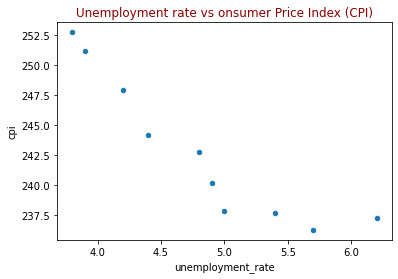

In [14]:
# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(x='unemployment_rate', y='cpi', kind='scatter')
plt.title('Unemployment rate vs onsumer Price Index (CPI)',**title_param)
plt.show()

In [15]:
inflation_unemploy[['unemployment_rate', 'cpi']].corr()

,unemployment_rate,cpi
unemployment_rate,1.000000,-0.919817
cpi,-0.919817,1.000000


# <font color=darkred>4.4 merge_ordered() caution, multiple columns</font> 

When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

The tables gdp and pop have been loaded.

**Instructions**
1. Use merge_ordered() on gdp and pop, merging on columns date and country with the fill feature, save to ctry_date.
2. Perform the same merge of gdp and pop, but join on country and date (reverse of step 1) with the fill feature, saving this as date_ctry.

**Results**

<font colo. r=darkgreen>Nice! When you merge on date first, the table is sorted by date then country. When forward fill is applied, Sweden's population value in January is used to fill in the missing values for both Australia and the Sweden for the remainder of the year. This is not what you want. The fill forward is using unintended data to fill in the missing values. However, when you merge on country first, the table is sorted by country then date, so the forward fill is applied appropriately in this situation.</font>

### <font color=darkblue><u>DATA</u></font>

In [16]:
gdp_australia

,date,country,gdp,series_code
0,1990-01-01,Australia,158051.13240,NYGDPMKTPSAKD
1,1990-04-01,Australia,158263.58160,NYGDPMKTPSAKD
2,1990-07-01,Australia,157329.27900,NYGDPMKTPSAKD
3,1990-09-01,Australia,158240.67810,NYGDPMKTPSAKD
4,1991-01-01,Australia,156195.95350,NYGDPMKTPSAKD
5,1991-04-01,Australia,155989.03270,NYGDPMKTPSAKD
6,1991-07-01,Australia,156635.85760,NYGDPMKTPSAKD
7,1991-09-01,Australia,156744.05660,NYGDPMKTPSAKD
8,1992-01-01,Australia,157916.08110,NYGDPMKTPSAKD
9,1992-04-01,Australia,159047.82710,NYGDPMKTPSAKD


In [17]:
pop_australia

,date,country,pop,series_code
0,1990-01-01,Australia,17065100,SP.POP.TOTL
1,1991-01-01,Australia,17284000,SP.POP.TOTL
2,1992-01-01,Australia,17495000,SP.POP.TOTL
3,1993-01-01,Australia,17667000,SP.POP.TOTL
4,1990-01-01,Sweden,8558835,SP.POP.TOTL
5,1991-01-01,Sweden,8617375,SP.POP.TOTL
6,1992-01-01,Sweden,8668067,SP.POP.TOTL
7,1993-01-01,Sweden,8718561,SP.POP.TOTL


### <font color=darkblue><u>USING pd.merge_ordered</u></font>

In [18]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp_australia, pop_australia, on=['date', 'country'], fill_method='ffill')
ctry_date

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,158051.13240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-01-01,Sweden,79837.84599,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
2,1990-04-01,Australia,158263.58160,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
3,1990-04-01,Sweden,80582.28597,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
4,1990-07-01,Australia,157329.27900,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
5,1990-07-01,Sweden,79974.36017,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
6,1990-09-01,Australia,158240.67810,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
7,1990-09-01,Sweden,80106.49738,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
8,1991-01-01,Australia,156195.95350,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
9,1991-01-01,Sweden,79524.24192,NYGDPMKTPSAKD,8617375,SP.POP.TOTL


In [19]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp_australia, pop_australia, on=['country','date'], fill_method='ffill')
date_ctry

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,158051.13240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-04-01,Australia,158263.58160,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
2,1990-07-01,Australia,157329.27900,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
3,1990-09-01,Australia,158240.67810,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
4,1991-01-01,Australia,156195.95350,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
5,1991-04-01,Australia,155989.03270,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
6,1991-07-01,Australia,156635.85760,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
7,1991-09-01,Australia,156744.05660,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
8,1992-01-01,Australia,157916.08110,NYGDPMKTPSAKD,17495000,SP.POP.TOTL
9,1992-04-01,Australia,159047.82710,NYGDPMKTPSAKD,17495000,SP.POP.TOTL


# <font color=darkred>4.5 Using merge_asof()</font>

**1. Using merge_asof()**
>In this lesson we will talk about another method for ordered or time-series data called merge_asof().

**2. Using merge_asof()**
>The merge_asof() method is similar to an ordered left-join. It has similar features as merge_ordered(). However, unlike an ordered left-join, merge_asof() will match on the nearest value columns rather than equal values. This brings up an important point - whatever columns you merge on must be sorted. In the table shown here, when we merge on column "C", we bring back all of the rows from the left table.

**3. Using merge_asof()**
>However, the row selected from the right table is the last row whose "C" value is less than or equal to the "C" value in the left table. So, for example, the second row in the left table is matched with the third row in the right table. This because 3 is the closest value in the right table that is still less than or equal to 5.

**4. Datasets**
>For this example, we will look at merging two tables. The first is stock price data for the Visa company with entries for every hour on Nov, 11, 2017. The second table is IBM stock prices on the same day with entries for roughly every five minutes.

**5. merge_asof() example**
>Let's use merge_asof() to merge the tables. The input arguments are very similar to what we have already seen in the course. Here we list the left and right tables first. Then we define that we want to merge on the "date_time" column. Finally, we provide a set of suffixes. Our output is similar to a left join, so we see all of the rows from the left Visa table. However, the values from the IBM table are based on how close the date_time values match with the Visa table. Notice the first row and the IBM price of 149.11. Let's show the IBM table again and see why this value was chosen in the merger. It comes from the row indexed as 4. This row has the closest date_time that is less than the date_time in the Visa table. The next row has a date_time that is slightly greater. We will adjust this behavior in our coming example.

**6. merge_asof() example with direction**
>This time in our merge_asof() method, we list the direction argument as "forward". This will change the behavior of the method to select the first row in the right table whose "on" key column is greater than or equal to the left's key column. The default value for the direction argument is "backward". When we look at our results, we see different values for the IBM column. Let's again look at the first IBM value and trace it back to the IBM table. We see it in the row indexed as 5. Its date_time is slightly greater than the date_time in the visa table. Finally, you can set the direction argument to "nearest" which returns the nearest row in the right table regardless if it is forward or backwards.

**7. When to use merge_asof()**
>Now that we reviewed the merge_asof() method, here are a couple of thoughts on when you might want to use it. First, you might think of this method when you are working with data sampled from a process and the dates or times may not exactly align. This is similar to what we did in our example. It could also be used when you are working on a time-series training set, where you do not want any events from the future to be visible before that point in time.

**8. Let's practice!**
>Let's practice!

### <font color=darkblue><u>DATA</u></font>

In [20]:
pd.merge_ordered(visa, ibm, on='date_time')

,date_time,close_x,close_y
0,2017-11-17 15:35:12,NaN,149.3000
1,2017-11-17 15:40:34,NaN,149.1300
2,2017-11-17 15:45:50,NaN,148.9800
3,2017-11-17 15:50:20,NaN,148.9900
4,2017-11-17 15:55:10,NaN,149.1100
5,2017-11-17 16:00:00,110.3200,NaN
6,2017-11-17 16:00:03,NaN,149.2500
7,2017-11-17 16:05:06,NaN,149.5175
8,2017-11-17 16:10:12,NaN,149.5700
9,2017-11-17 16:15:30,NaN,149.5900


### <font color=darkblue><u>pd.merge_asof</u></font>

In [21]:
pd.merge_asof(visa, ibm, on='date_time', suffixes=('_visa','_ibm'))

,date_time,close_visa,close_ibm
0,2017-11-17 16:00:00,110.3200,149.11
1,2017-11-17 17:00:00,110.2400,149.96
2,2017-11-17 18:00:00,110.0650,149.96
3,2017-11-17 19:00:00,110.0400,149.96
4,2017-11-17 20:00:00,110.0000,149.96
5,2017-11-17 21:00:00,109.9966,149.96
6,2017-11-17 22:00:00,109.8200,149.96


In [22]:
pd.merge_asof(visa, ibm, on='date_time', suffixes=('_visa','_ibm'), direction='forward')

,date_time,close_visa,close_ibm
0,2017-11-17 16:00:00,110.3200,149.25
1,2017-11-17 17:00:00,110.2400,NaN
2,2017-11-17 18:00:00,110.0650,NaN
3,2017-11-17 19:00:00,110.0400,NaN
4,2017-11-17 20:00:00,110.0000,NaN
5,2017-11-17 21:00:00,109.9966,NaN
6,2017-11-17 22:00:00,109.8200,NaN


In [23]:
pd.merge_asof(visa, ibm, on='date_time', suffixes=('_visa','_ibm'), direction='nearest')

,date_time,close_visa,close_ibm
0,2017-11-17 16:00:00,110.3200,149.25
1,2017-11-17 17:00:00,110.2400,149.96
2,2017-11-17 18:00:00,110.0650,149.96
3,2017-11-17 19:00:00,110.0400,149.96
4,2017-11-17 20:00:00,110.0000,149.96
5,2017-11-17 21:00:00,109.9966,149.96
6,2017-11-17 22:00:00,109.8200,149.96


# <font color=darkred>4.6 Using merge_asof() to study stocks</font> 

You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the pandas .diff() method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

The three log files have been loaded for you as tables named jpm, wells, and bac.

**Instructions**

1. Use merge_asof() to merge jpm (left table) and wells together on the date_time column, where the rows with the nearest times are matched, and with suffixes=('', '_wells'). Save to jpm_wells.
2. Use merge_asof() to merge jpm_wells (left table) and bac together on the date_time column, where the rows with the closest times are matched, and with suffixes=('_jpm', '_bac'). Save to jpm_wells_bac.
3. Using price_diffs, create a line plot of the close price of JPM, WFC, and BAC only.

**Results**

<font color=darkgreen>Fabulous! You can see that during this period, the price change for these bank stocks was roughly the same, although the price change for JP Morgan was more variable. The critical point here is that the merge_asof() function is very useful in performing the fuzzy matching between the timestamps of all the tables.</font>

### <font color=darkblue><u>DATA</u></font>

In [24]:
pd.merge_ordered(pd.merge_ordered(jpm, wells, on='date_time', suffixes=('','_wells')), 
                                       bac,   on='date_time', suffixes=('_jpm','_bac'))

,date_time,close_jpm,close_wells,close_bac
0,2017-11-17 15:35:08,NaN,54.3227,NaN
1,2017-11-17 15:35:17,98.1200,NaN,26.552
2,2017-11-17 15:40:00,NaN,54.3200,NaN
3,2017-11-17 15:40:04,98.1800,NaN,NaN
4,2017-11-17 15:40:06,NaN,NaN,26.552
5,2017-11-17 15:45:01,97.7307,NaN,NaN
6,2017-11-17 15:45:05,NaN,NaN,26.388
7,2017-11-17 15:45:32,NaN,54.1900,NaN
8,2017-11-17 15:50:07,NaN,54.1700,NaN
9,2017-11-17 15:50:34,NaN,NaN,26.378


### <font color=darkblue><u>pd.merge_asof</u></font>

In [25]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', direction='nearest', suffixes=('', '_wells'))
jpm_wells

,date_time,close,close_wells
0,2017-11-17 15:35:17,98.1200,54.3227
1,2017-11-17 15:40:04,98.1800,54.3200
2,2017-11-17 15:45:01,97.7307,54.1900
3,2017-11-17 15:50:55,97.7400,54.1700
4,2017-11-17 15:55:00,97.8150,54.1841
5,2017-11-17 16:00:30,98.0200,54.2650
6,2017-11-17 16:05:07,97.8000,54.2000
7,2017-11-17 16:10:08,97.8400,54.1550
8,2017-11-17 16:15:11,97.7100,54.1900
9,2017-11-17 16:20:29,97.7600,54.2050


In [26]:
# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', direction='nearest', suffixes=('_jpm', '_bac'))
jpm_wells_bac = jpm_wells_bac.set_index('date_time')
jpm_wells_bac

,close_jpm,close_wells,close_bac
date_time,,,
2017-11-17 15:35:17,98.1200,54.3227,26.552
2017-11-17 15:40:04,98.1800,54.3200,26.552
2017-11-17 15:45:01,97.7307,54.1900,26.388
2017-11-17 15:50:55,97.7400,54.1700,26.378
2017-11-17 15:55:00,97.8150,54.1841,26.383
2017-11-17 16:00:30,98.0200,54.2650,26.452
2017-11-17 16:05:07,97.8000,54.2000,26.373
2017-11-17 16:10:08,97.8400,54.1550,26.388
2017-11-17 16:15:11,97.7100,54.1900,26.369


In [27]:
# Compute price diff
price_diffs = jpm_wells_bac.diff()
price_diffs = price_diffs.dropna()
price_diffs

,close_jpm,close_wells,close_bac
date_time,,,
2017-11-17 15:40:04,0.0600,-0.0027,0.000
2017-11-17 15:45:01,-0.4493,-0.1300,-0.164
2017-11-17 15:50:55,0.0093,-0.0200,-0.010
2017-11-17 15:55:00,0.0750,0.0141,0.005
2017-11-17 16:00:30,0.2050,0.0809,0.069
2017-11-17 16:05:07,-0.2200,-0.0650,-0.079
2017-11-17 16:10:08,0.0400,-0.0450,0.015
2017-11-17 16:15:11,-0.1300,0.0350,-0.019
2017-11-17 16:20:29,0.0500,0.0150,0.019


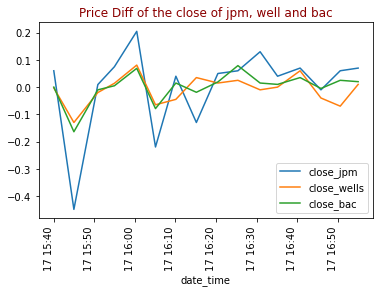

In [28]:
# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'], rot=90)
plt.title('Price Diff of the close of jpm, well and bac', **title_param)
plt.show()

# <font color=darkred>4.7 Using merge_asof() to create dataset</font> 

The merge_asof() function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given gdp, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table recession has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use merge_asof() to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

The tables gdp and recession have been loaded for you.

**Instructions**
1. Using merge_asof(), merge gdp and recession on date, with gdp as the left table. Save to the variable gdp_recession.
2. Create a list using a list comprehension and a conditional expression, named is_recession, where for each row if the gdp_recession['econ_status'] value is equal to 'recession' then enter 'r' else 'g'.
3. Using gdp_recession, plot a bar chart of gdp versus date, setting the color argument equal to is_recession.

**Results**

<font color=darkgreen>Terrific work! You can see from the chart that there were a number of quarters early in the 1980s where a recession was an issue. merge_asof() allowed you to quickly add a flag to the gdp dataset by matching between two different dates, in one line of code! If you were to perform the same task using subsetting, it would have taken a lot more code.</font>

### <font color=darkblue><u>DATA</u></font>

In [29]:
pd.merge_ordered(gdp_1979_1984, recession_1980_2009, on='date', suffixes=('_gdp','_recesion'))

,date,gdp,econ_status
0,1979-01-01,2526.610,NaN
1,1979-04-01,2591.247,NaN
2,1979-07-01,2667.565,NaN
3,1979-10-01,2723.883,NaN
4,1980-01-01,2789.842,recession
5,1980-04-01,2797.352,NaN
6,1980-07-01,2856.483,NaN
7,1980-08-01,NaN,normal
8,1980-10-01,2985.557,NaN
9,1981-01-01,3124.206,NaN


### <font color=darkblue><u>pd.merge_asof</u></font>

In [30]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp_1979_1984, recession_1980_2009, on='date', direction='backward')
gdp_recession

,date,gdp,econ_status
0,1979-01-01,2526.610,NaN
1,1979-04-01,2591.247,NaN
2,1979-07-01,2667.565,NaN
3,1979-10-01,2723.883,NaN
4,1980-01-01,2789.842,recession
5,1980-04-01,2797.352,recession
6,1980-07-01,2856.483,recession
7,1980-10-01,2985.557,normal
8,1981-01-01,3124.206,normal
9,1981-04-01,3162.532,normal


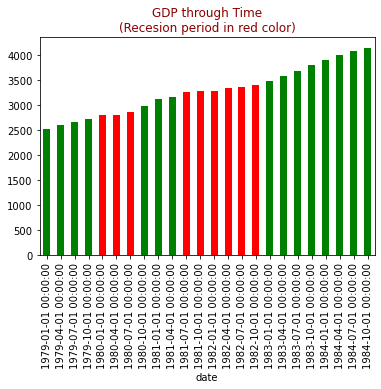

In [31]:
# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.title('GDP through Time\n(Recesion period in red color)', **title_param)
plt.legend().set_visible(False)
plt.show()

# <font color=darkred>4.8 merge_asof() and merge_ordered() differences</font> 

The merge_asof() and merge_ordered() functions are similar in the type of merge they perform and the input arguments they use. In this exercise, think about how the functions are different.

**Instructions**

Drag and drop the statement into the appropriate box for either the merge_asof() function, the merge_ordered() function, or both if it applies to both functions.

**Results**

|pd.merge_asof()|both|pd.merge_ordered| 
|-----|-------|------| 
|It can be used to do fuzzy <br>matching of dates between <br>tables.|This function can be used <br>when working with ordered or <br>time-series data.|It allows for a right join during <br>the merge.|
|After matching two tables, if <br>there are missing values at <br>the top of the table from the <br>right table, this function can <br>fill them in.|This function can set the suffix<br>for overlapping column<br>names.|It it cannot match the rows of <br>the tables exactly, it can use <br>forward fill to interpolate the <br>missing data.|
|Has an argument that can <br>be set to 'fordward' to <br>select the first row in the <br>right table whose key <br>column is greater than or <br>equal to the lefts.| | |

<font color=darkgreen>Remarkable work! You were able to identify some of the similarities and differences between the functions. You are well on your way to mastering both!</font>

# <font color=darkred>4.9 Selecting data with .query()</font>

**1. Selecting data with .query()**
>Now that you have learned quite a bit about combining data from different data sources, let's review a pandas method for selecting data from the table called the query() method. Pandas provides many methods for selecting data, and query() is one of them.

**2. The .query() method**
>The query() method accepts an input string that it will use to select rows to return from the table. For those familiar with SQL, the string you provide to the query function is similar to the portion after the WHERE clause of a SQL statement. However, don't let the SQL statement scare you, because prior knowledge of SQL isn't required. Let's look at an example.

**3. Querying on a single condition**
>We have the following table named stocks with the stock price of Disney and Nike on different days. Now imagine we would like to select the rows where Nike is equal to or above 90. Here we provide a string to the query method. The string identifies that we want to condition which rows are returned by the value of the Nike column. We simply input "nike >= 90". The method returns all rows in stocks where Nike is greater than or equal to 90.

**4. Querying on a multiple conditions, "and", "or"**
>Let's look at another example. Here we use the "and" keyword to select rows where Nike is greater than 90 and Disney is less than 140. The method returns two rows of data that match our criteria. Next, instead of using "and" we can also use the "or" keyword. This input string should select all rows where Nike is over 96 or Disney is less than 98. Now the function returns three rows that meet our criteria.

**5. Updated dataset**
>Our next example shows that you can use the query method to select strings. Imagine now that we have an updated dataset, which is the stocks table in a slightly different format.

**6. Using .query() to select text**
>We are interested in selecting all of the rows were the column stock equals "disney" or the column stock equals "nike" and close is less than 90. Let's pause here for a moment to look at our query string. Within the parentheses of our string, we check if the stock column is nike and the close column is less than 90. Both of these conditions have to be true for the parentheses section to return true. We then add that to the condition to check if stock is listed as "disney". When checking text, we use the double equal signs, similar to an if statement in Python. Also, when checking a text string, we used double quotes to surround the word. This is to avoid unintentionally ending our string statement since we used single quotes to start the statement. In our results, we see all of our Disney rows returned. Also, those rows were Nike is the stock name and the close price is less than 90 are returned.

**7. Let's practice!**
>It's time for you to try using the query() method.

# <font color=darkred>4.10 Explore financials with .query()</font>

**Instructions**
You have been given a table of financial data from some popular social network companies called social_fin. All of the values are in thousands of US dollars.

Use the .query() method and the console to explore social_fin and select the True statement.


**Possible Answers**

- There 2 rows where the value is greater than \$50,000,000K.
- There are 3 rows for total revenue for Facebook.
- <font color=red><u>There are 6 rows where the net income has a negative value.</u></font>
- There are 45 rows, where the gross profit is greater than \$100K.

**Results**

<font color=darkgreen>That's correct! To check this answer you needed to select financial equal to net income and value < 0.</font>

In [32]:
social_fin.query('value>50000')

,financial,company,year,value
0,total_revenue,twitter,2019,3459329
1,cost_of_revenue,twitter,2019,1137041
2,gross_profit,twitter,2019,2322288
3,operating_expenses,twitter,2019,1955915
4,net_income,twitter,2019,1465659
5,total_revenue,facebook,2019,70697000
6,cost_of_revenue,facebook,2019,12770000
7,gross_profit,facebook,2019,57927000
8,operating_expenses,facebook,2019,33941000
9,net_income,facebook,2019,18485000


In [33]:
social_fin.query('financial=="total_revenue"')

,financial,company,year,value
0,total_revenue,twitter,2019,3459329
5,total_revenue,facebook,2019,70697000
10,total_revenue,snap,2019,1715534
15,total_revenue,twitter,2018,3042359
20,total_revenue,facebook,2018,55838000
25,total_revenue,snap,2018,1180446
30,total_revenue,twitter,2017,2443299
35,total_revenue,facebook,2017,40653000
40,total_revenue,snap,2017,824949
45,total_revenue,twitter,2016,2529619


In [34]:
social_fin.query('financial=="net_income" and value<0')

,financial,company,year,value
14,net_income,snap,2019,-1033660
29,net_income,snap,2018,-1255911
34,net_income,twitter,2017,-108063
44,net_income,snap,2017,-3445066
49,net_income,twitter,2016,-456873
59,net_income,snap,2016,-514643


In [35]:
social_fin.query('financial=="gross_profit" and value>100')

,financial,company,year,value
2,gross_profit,twitter,2019,2322288
7,gross_profit,facebook,2019,57927000
12,gross_profit,snap,2019,819696
17,gross_profit,twitter,2018,2077362
22,gross_profit,facebook,2018,46483000
27,gross_profit,snap,2018,381581
32,gross_profit,twitter,2017,1582057
37,gross_profit,facebook,2017,35199000
42,gross_profit,snap,2017,107487
47,gross_profit,twitter,2016,1597379


# <font color=darkred>4.11 Subsetting rows with .query()</font> 

In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the .query() method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the .query() method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

The tables gdp and pop have been loaded for you.

**Instructions**
1. Use merge_ordered() on gdp and pop on columns country and date with the fill feature, save to gdp_pop and print.
2. Add a column named gdp_per_capita to gdp_pop that divides gdp by pop.
3. Pivot gdp_pop so values='gdp_per_capita', index='date', and columns='country', save as gdp_pivot.
4. Use .query() to select rows from gdp_pivot where date is greater than equal to 1991-01-01". Save as recent_gdp_pop.

**Results**

<font color=darkgreen>Amazing! You can see from the plot that the per capita GDP of Australia passed Sweden in 1992. By using the .query() method, you were able to select the appropriate rows easily. The .query() method is easy to read and straightforward.</font>

In [36]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp_australia, pop_australia, on=['country', 'date'], 
                           suffixes=('_pop', '_gdp'), fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']
gdp_pop

,date,country,gdp,series_code_pop,pop,series_code_gdp,gdp_per_capita
0,1990-01-01,Australia,158051.13240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,0.009262
1,1990-04-01,Australia,158263.58160,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,0.009274
2,1990-07-01,Australia,157329.27900,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,0.009219
3,1990-09-01,Australia,158240.67810,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,0.009273
4,1991-01-01,Australia,156195.95350,NYGDPMKTPSAKD,17284000,SP.POP.TOTL,0.009037
5,1991-04-01,Australia,155989.03270,NYGDPMKTPSAKD,17284000,SP.POP.TOTL,0.009025
6,1991-07-01,Australia,156635.85760,NYGDPMKTPSAKD,17284000,SP.POP.TOTL,0.009062
7,1991-09-01,Australia,156744.05660,NYGDPMKTPSAKD,17284000,SP.POP.TOTL,0.009069
8,1992-01-01,Australia,157916.08110,NYGDPMKTPSAKD,17495000,SP.POP.TOTL,0.009026
9,1992-04-01,Australia,159047.82710,NYGDPMKTPSAKD,17495000,SP.POP.TOTL,0.009091


In [37]:
# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table(values='gdp_per_capita', index='date', columns='country')
gdp_pivot

country,Australia,Sweden
date,,
1990-01-01,0.009262,0.009328
1990-04-01,0.009274,0.009415
1990-07-01,0.009219,0.009344
1990-09-01,0.009273,0.009360
1991-01-01,0.009037,0.009228
1991-04-01,0.009025,0.009176
1991-07-01,0.009062,0.009177
1991-09-01,0.009069,0.009253
1992-01-01,0.009026,0.009159


In [38]:
# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date>="1991-01-01"')
recent_gdp_pop

country,Australia,Sweden
date,,
1991-01-01,0.009037,0.009228
1991-04-01,0.009025,0.009176
1991-07-01,0.009062,0.009177
1991-09-01,0.009069,0.009253
1992-01-01,0.009026,0.009159
1992-04-01,0.009091,0.009121
1992-07-01,0.009183,0.009103
1992-09-01,0.009372,0.008883
1993-01-01,0.009345,0.008692


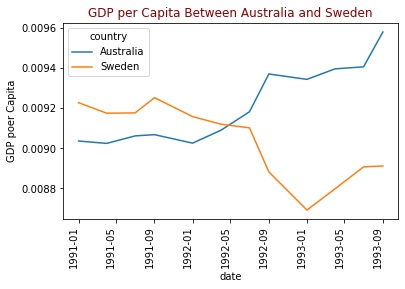

In [39]:
# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.ylabel('GDP poer Capita')
plt.title('GDP per Capita Between Australia and Sweden', **title_param)
plt.show()

# <font color=darkred>4.12 Reshaping data with .melt()</font>

**1. Reshaping data with .melt()**
>In our last lesson of the course, let's talk about the melt method. This method will unpivot a table from wide to long format. This is often a much more computer-friendly format, therefore making this a valuable method to know.

**2. Wide versus long data**
>Sometimes we will come across data where every row relates to one subject, and each column has different information about an attribute of that subject. Data formatted in this way is often called wide. There are other times when the information about one subject is found over many rows, and each row has one attribute about that subject. Data formatted in this way is often called long or tall. In general, wide formatted data is easier to read by people than long formatted. However, long formatted data is often more accessible for computers to work with.

**3. What does the .melt() method do?**
>The melt method will allow us to unpivot, or change the format of, our dataset. In this image, we change the height and weight columns from their wide horizontal placement to a long vertical placement.

**4. Dataset in wide format**
>To demonstrate the melt method, let's start with this dataset of financial metrics of two popular social media companies. Notice that the years are horizontal. Let's change them so that they are vertically placed.

**5. Example of .melt()**
>Here we call the melt() method on the table social_fin. The first input argument to the method is id_vars. These are columns to be used as identifier variables. We can also think of them as columns in our original dataset that we do not want to change. In our output, we print the first ten rows. Our years are listed vertically. Our final column now has all of our values in one column versus multiple columns. Again, this is a much more computer-friendly format than our original table. We unpivoted each of the separate columns 2016 through 2019. Our output has data for every year in our starting table, but again, we are only showing the first couple of rows. In the next example, we will look at how to control what columns are unpivoted.

**6. Melting with value_vars**
>This time, let's use the argument value_vars with the melt() method. This argument will allow us to control which columns are unpivoted. Here, we unpivot only the 2018 and 2017 columns. Our output now only has data for the years 2018 and 2017. Additionally, the order of the value_var was kept. The output starts with 2018, then moves to 2017. Finally, notice that the column with the years is now named variable, and our values column is named value. We will adjust that in our next example.

**7. Melting with column names**
>In this example, we have added some additional inputs to our melt() method. The var_name argument will allow us to set the name of the year column in the output. Similarly, the value_name argument will allow us to set the name of the value column in the output. We again print the first few rows of the output. It is the same as before, except our variable and value columns are renamed year and dollars, respectively. We have seen how the melt() method is useful for reshaping our tables. Imagine a situation where you have merged many columns, making your table very wide. The merge() method can then be used to reshape that table into a more computer-friendly format.

**8. Let's practice!**
>Alright, time to practice!

In [40]:
# Dataset in wide format
social_fin_wide

,financial,company,2019,2018,2017,2016
0,total_revenue,twitter,3459329,3042359,2443299,2529619
1,gross_profit,twitter,2322288,2077362,1582057,1597379
2,net_income,twitter,1465659,1205596,-108063,-456873
3,total_revenue,facebook,70697000,55838000,40653000,27638000
4,gross_profit,facebook,57927000,46483000,35199000,23849000
5,net_income,facebook,18485000,22112000,15934000,10217000


In [41]:
# Example of .melt()
social_fin_tall = social_fin_wide.melt(id_vars=['financial','company'])
social_fin_tall

,financial,company,variable,value
0,total_revenue,twitter,2019,3459329
1,gross_profit,twitter,2019,2322288
2,net_income,twitter,2019,1465659
3,total_revenue,facebook,2019,70697000
4,gross_profit,facebook,2019,57927000
5,net_income,facebook,2019,18485000
6,total_revenue,twitter,2018,3042359
7,gross_profit,twitter,2018,2077362
8,net_income,twitter,2018,1205596
9,total_revenue,facebook,2018,55838000


In [42]:
# Melting with value_vars
social_fin_tall = social_fin_wide.melt(id_vars    = ['financial','company'],
                                       value_vars = ['2018','2017'])
social_fin_tall

,financial,company,variable,value
0,total_revenue,twitter,2018,3042359
1,gross_profit,twitter,2018,2077362
2,net_income,twitter,2018,1205596
3,total_revenue,facebook,2018,55838000
4,gross_profit,facebook,2018,46483000
5,net_income,facebook,2018,22112000
6,total_revenue,twitter,2017,2443299
7,gross_profit,twitter,2017,1582057
8,net_income,twitter,2017,-108063
9,total_revenue,facebook,2017,40653000


In [43]:
# Melting with column names
social_fin_tall = social_fin_wide.melt(id_vars    = ['financial','company'],
                                       value_vars = ['2018','2017'],
                                       var_name   = ['year'], 
                                       value_name = 'dollars')
social_fin_tall

,financial,company,year,dollars
0,total_revenue,twitter,2018,3042359
1,gross_profit,twitter,2018,2077362
2,net_income,twitter,2018,1205596
3,total_revenue,facebook,2018,55838000
4,gross_profit,facebook,2018,46483000
5,net_income,facebook,2018,22112000
6,total_revenue,twitter,2017,2443299
7,gross_profit,twitter,2017,1582057
8,net_income,twitter,2017,-108063
9,total_revenue,facebook,2017,40653000


# <font color=darkred>4.13 Select the right .melt() arguments</font>

**Instructions**

You are given a table named inflation. Chose the option to get the same output as the table below.

|  | country|    indicator|  year|  annual|
|-|-|-|-|-|
|0 |  Brazil|  Inflation %|  2017|    3.45|
|1 |  Canada|  Inflation %|  2017|    1.60|
|2 |  France|  Inflation %|  2017|    1.03|
|3 |   India|  Inflation %|  2017|    2.49|
|4 |  Brazil|  Inflation %|  2018|    3.66|
|5 |  Canada|  Inflation %|  2018|    2.27|
|6 |  France|  Inflation %|  2018|    1.85|
|7 |   India|  Inflation %|  2018|    4.86|
|8 |  Brazil|  Inflation %|  2019|    3.73|
|9 |  Canada|  Inflation %|  2019|    1.95|
|10|  France|  Inflation %|  2019|    1.11|
|11|   India|  Inflation %|  2019|    7.66|

**Possible Answers**

- inflation.melt(id_vars=['country','indicator'], var_name='annual')
- inflation.melt(id_vars=['country'], var_name='indicator', value_name='annual')
- <font color=red><u>inflation.melt(id_vars=['country','indicator'], var_name='year', value_name='annual')</u></font>
- inflation.melt(id_vars=['country'], var_name='year', value_name='annual')

**Results**

<font color=darkgreen>Magnificent! You identified the correct values to pass to the id_vars argument. These columns are not unpivoted. Finally, the other arguments set the name for the year and value columns.</font>

In [44]:
inflation_wide.head()

,country,indicator,2017,2018,2019
0,Brazil,Inflation %,3.45,3.66,3.73
1,Canada,Inflation %,1.60,2.27,1.95
2,France,Inflation %,1.03,1.85,1.11
3,India,Inflation %,2.49,4.86,7.66


In [45]:
inflation_wide.melt(id_vars=['country','indicator'], var_name='annual')

,country,indicator,annual,value
0,Brazil,Inflation %,2017,3.45
1,Canada,Inflation %,2017,1.60
2,France,Inflation %,2017,1.03
3,India,Inflation %,2017,2.49
4,Brazil,Inflation %,2018,3.66
5,Canada,Inflation %,2018,2.27
6,France,Inflation %,2018,1.85
7,India,Inflation %,2018,4.86
8,Brazil,Inflation %,2019,3.73
9,Canada,Inflation %,2019,1.95


In [46]:
inflation_wide.melt(id_vars=['country'], var_name='indicator', value_name='annual')

,country,indicator,annual
0,Brazil,indicator,Inflation %
1,Canada,indicator,Inflation %
2,France,indicator,Inflation %
3,India,indicator,Inflation %
4,Brazil,2017,3.45
5,Canada,2017,1.6
6,France,2017,1.03
7,India,2017,2.49
8,Brazil,2018,3.66
9,Canada,2018,2.27


In [47]:
inflation_wide.melt(id_vars=['country','indicator'], var_name='year', value_name='annual')

,country,indicator,year,annual
0,Brazil,Inflation %,2017,3.45
1,Canada,Inflation %,2017,1.60
2,France,Inflation %,2017,1.03
3,India,Inflation %,2017,2.49
4,Brazil,Inflation %,2018,3.66
5,Canada,Inflation %,2018,2.27
6,France,Inflation %,2018,1.85
7,India,Inflation %,2018,4.86
8,Brazil,Inflation %,2019,3.73
9,Canada,Inflation %,2019,1.95


In [48]:
inflation_wide.melt(id_vars=['country'], var_name='year', value_name='annual')

,country,year,annual
0,Brazil,indicator,Inflation %
1,Canada,indicator,Inflation %
2,France,indicator,Inflation %
3,India,indicator,Inflation %
4,Brazil,2017,3.45
5,Canada,2017,1.6
6,France,2017,1.03
7,India,2017,2.49
8,Brazil,2018,3.66
9,Canada,2018,2.27


# <font color=darkred>4.14 Using .melt() to reshape government data</font> 

The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using .melt(). You will need to add a date column to the table and sort by it to plot the data correctly.

The unemployment rate data has been loaded for you in a table called ur_wide. You are encouraged to view the table in the console before beginning the exercise.

**Instructions**
1. Use .melt() to unpivot all of the columns of ur_wide except year and ensure that the columns with the months and values are named month and unempl_rate, respectively. Save the result as ur_tall.
2. Add a column to ur_tall named date which combines the year and month columns as year-month format into a larger string, and converts it to a date data type.
3. Sort ur_tall by date and save as ur_sorted.
4. Using ur_sorted, plot unempl_rate on the y-axis and date on the x-axis.

**Results**

<font color=darkgreen>Nice going! The plot shows a steady decrease in the unemployment rate with an increase near the end. This increase is likely the effect of the COVID-19 pandemic and its impact on shutting down most of the US economy. In general, data is often provided (especially by governments) in a format that is easily read by people but not by machines. The .melt() method is a handy tool for reshaping data into a useful form.</font>

In [49]:
unemployment_rate

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3
1,2011,9.1,9.0,9.0,9.1,9.0,9.1,9.0,9.0,9.0,8.8,8.6,8.5
2,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
3,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
4,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
5,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
6,2016,4.9,4.9,5.0,5.0,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
7,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.2,4.1,4.2,4.1
8,2018,4.1,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.7,3.9
9,2019,4.0,3.8,3.8,3.6,3.6,3.7,3.7,3.7,3.5,3.6,3.5,3.5


In [50]:
# unpivot everything besides the year column
ur_tall = unemployment_rate.melt(id_vars=['year'], var_name='month', value_name='unempl_rate')
ur_tall.head()

,year,month,unempl_rate
0,2010,jan,9.8
1,2011,jan,9.1
2,2012,jan,8.3
3,2013,jan,8.0
4,2014,jan,6.6


In [51]:
# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'].astype(str) + '-' + ur_tall['month'].values)
ur_tall.head()

,year,month,unempl_rate,date
0,2010,jan,9.8,2010-01-01
1,2011,jan,9.1,2011-01-01
2,2012,jan,8.3,2012-01-01
3,2013,jan,8.0,2013-01-01
4,2014,jan,6.6,2014-01-01


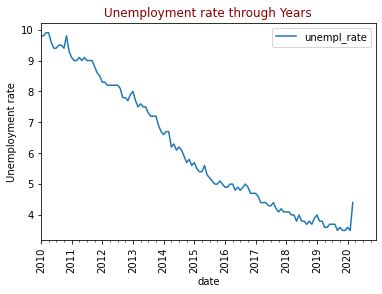

In [52]:
# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date')

# Plot the unempl_rate by date
ur_sorted.plot(x='date', y='unempl_rate', rot=90)
plt.ylabel('Unemployment rate')
plt.title('Unemployment rate through Years', **title_param)
plt.show()

# <font color=darkred>4.15 Using .melt() for stocks vs bond performance</font> 

It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the .melt() method to reshape this table.

Additionally, you will use the .query() method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

The tables ten_yr and dji have been loaded for you.

**Instructions**
1. Use .melt() on ten_yr to unpivot everything except the metric column, setting var_name='date' and value_name='close'. Save the result to bond_perc.
2. Using the .query() method, select only those rows were metric equals 'close', and save to bond_perc_close.
3. Use merge_ordered() to merge dji (left table) and bond_perc_close on date with an inner join, and set suffixes equal to ('_dow', '_bond'). Save the result to dow_bond.
4. Using dow_bond, plot only the Dow and bond values.

**Results**

<font color=darkgreen>Super job! You used many of the techniques we have reviewed in this chapter to produce the plot. The plot confirms that the bond and stock prices are inversely correlated. Often as the price of stocks increases, the price for bonds decreases.</font>

In [53]:
ten_yr

,metric,2007-02-01,2007-03-01,2007-04-01,2007-05-01,2007-06-01,2007-07-01,2007-08-01,2007-09-01,2007-10-01,...,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01
0,open,0.033491,-0.060449,0.025426,-0.004312,0.060632,0.027154,-0.059233,-0.046271,0.014400,...,0.045888,-0.102599,0.191049,0.106726,0.023966,-0.006687,-0.046564,-0.032068,0.034347,-0.050544
1,high,-0.007338,-0.040657,0.022046,0.030576,0.080268,-0.021633,-0.059796,-0.038446,0.003615,...,-0.004257,0.041105,0.186987,0.068121,-0.061784,0.031864,-0.090324,0.012447,-0.004191,0.099327
2,low,-0.016147,-0.007984,0.031075,-0.002168,0.059105,-0.027288,-0.051677,-0.043372,0.002558,...,-0.062405,0.068994,0.168185,0.123172,-0.055266,0.039510,-0.035946,-0.050733,0.030264,0.007188
3,close,-0.057190,0.021538,-0.003873,0.056156,0.029243,-0.052056,-0.049046,0.009257,-0.022712,...,-0.117067,0.163501,0.109155,0.016739,-0.006245,-0.028563,-0.027639,0.025703,-0.056309,0.200562


In [54]:
print(dji.shape)
dji.head()

(159, 2)


,date,close
0,2007-02-01,0.005094
1,2007-03-01,-0.026139
2,2007-04-01,0.048525
3,2007-05-01,0.052007
4,2007-06-01,-0.016070


In [55]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars='metric', var_name='date', value_name='close')
print(bond_perc.shape)
bond_perc.head()

(140, 3)


,metric,date,close
0,open,2007-02-01,0.033491
1,high,2007-02-01,-0.007338
2,low,2007-02-01,-0.016147
3,close,2007-02-01,-0.057190
4,open,2007-03-01,-0.060449


In [56]:
# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric == "close"')
print(bond_perc_close.shape)
bond_perc_close.head()

(35, 3)


,metric,date,close
3,close,2007-02-01,-0.057190
7,close,2007-03-01,0.021538
11,close,2007-04-01,-0.003873
15,close,2007-05-01,0.056156
19,close,2007-06-01,0.029243


In [57]:
# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', how='inner', suffixes=('_dow', '_bond'))
print(dow_bond.shape)
dow_bond.head()

(35, 4)


,date,close_dow,metric,close_bond
0,2007-02-01,0.005094,close,-0.057190
1,2007-03-01,-0.026139,close,0.021538
2,2007-04-01,0.048525,close,-0.003873
3,2007-05-01,0.052007,close,0.056156
4,2007-06-01,-0.016070,close,0.029243


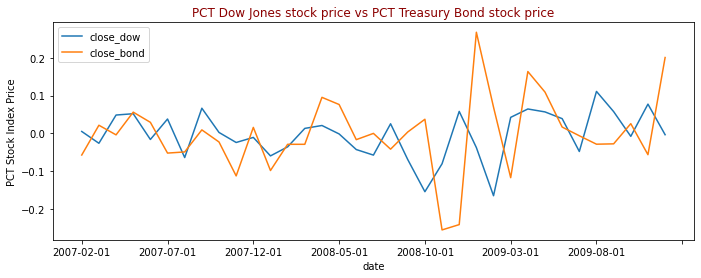

In [58]:
# Plot only the close_dow and close_bond columns
fig, ax = plt.subplots(figsize=(11.5, 4))
dow_bond.plot(y=['close_dow', 'close_bond'], x='date', rot=0, ax=ax)
plt.ylabel('PCT Stock Index Price')
plt.title('PCT Dow Jones stock price vs PCT Treasury Bond stock price', **title_param)
plt.show()

In [59]:
dow_bond[['close_dow', 'close_bond']].corr()

,close_dow,close_bond
close_dow,1.000000,-0.022286
close_bond,-0.022286,1.000000


# <font color=darkred>4.16 Course wrap-up</font>

**1. Course wrap-up**
>Congratulations! You have completed all the videos and exercises. You should feel proud.

**2. You're this high performance race car now**
>It wasn't long ago when you started the course. Now you're like this high-performance race car when it comes to combining data. In this course, we covered a lot of topics.
>
>(1) Photo by jae park from Pexels

**3. Data merging basics**
>In chapter one, you performed an inner join with the default settings using the merge() method. You also learned about the different types of table relationships and merging multiple tables. These are the basics of using the combining data with the merge() method.

**4. Merging tables with different join types**
>In the second chapter, you expanded your joining skills to many different types of joins. You also learned how to merge a table to itself and how to merge using indexes.

**5. Advanced merging and concatenating**
>In the third chapter, you learned about filtering joins, such as semi- and anti-joins. You also learned how to combine data vertically with the concat() method and about the importance of data integrity.

**6. Merging ordered and time-series data**
>In the last chapter you discovered how to merge ordered and time-series data with merge_ordered() and merge_asof(). In the last lesson, you learned how to use melt().

**7. Thank you!**
>Thank you for completing the course and for the time you put in. I wish you luck as you continue your learning journey.

# Aditional material

- Datacamp course: https://learn.datacamp.com/courses/extreme-gradient-boosting-with-xgboost
- Data source:
    - https://finance.yahoo.com/quote/AAPL/history?p=AAPL
    - https://finance.yahoo.com/quote/MCD/history?p=MCD
    - https://beta.bls.gov/dataQuery/find?st=0&r=100&s=popularity%3AD&q=unemployment+rate&more=0
    - https://beta.bls.gov/dataViewer/view;jsessionid=B22128E55B86EB23BF74900ACAEC603C
    - https://www.bls.gov/cpi/tables/seasonal-adjustment/home.htm
    - https://data.worldbank.org/indicator/SP.POP.TOTL
    - https://databank.worldbank.org/reports.aspx?source=2&series=SP.POP.TOTL&country=#